<a href="https://colab.research.google.com/github/Sanjeevhegde009/EDA-Capstone-Project-Playstore-App-Data-Review/blob/main/EDA_Capstone_Project_Playstore_App_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Playstore** App Reviews
Google Playstore is probably the most popular android app store developed by Google LLC. for devices operating on Android Operating System. On this platform, developers host their app for users to downlaod and avail the services provided by the app. Users can also, rate and review any app while other information regarding the app are publicly visible on the platform along with the ratings and reviews. Hence, any data relating to the playstore apps will provide significant insights to the users, enabling developers to build applications in best posssible ways. Let us now analyse the given data sets and see what all meaningful insights can be drawn 



In [236]:
#importing and mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
#importing essential libraries such as pandas, numpy and matplotlib
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
%matplotlib inline
import seaborn as sns


In [238]:
#Loading the data sets which need to eb analysed
app_data=pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')

In [239]:
#Checking the content in follwing two lines
app_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [240]:
app_data.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [241]:
#user_reviews.head(5)

In [242]:
#checking the number of rows and columns in both of the data sets
app_data.shape   #, user_reviews.shape

(10841, 13)

In [243]:
#checking the information regarding the data present in the data set
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [244]:
#key parameters provided for each app listed in the data set
app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Description of the coulumns in Playstore Data

1. App: The name of the app on which the data is provided
2. Category: The category to which the app belongs to. (All the categories listed in the given data are provided in later section)
3. Rating: User Rating for the app out of 5
4. Size: Size of the the application 
5. Installs: Total Number of installations
6. Type: Free or paid
7. Price: Price of the application
8. Content Rating: To whom the application has been developed for
9. Genres: Genre the application belongs to
10. Last Updated: Last update provided the developer for the app
11. Current Ver: Present version of the application
12. android ver: Android version that application is supported on

In [245]:
#user_reviews.info()

In [246]:
#key parameters provided regarding the user feedbacks/reviews
#user_reviews.columns

## Performing Data Cleaning operations on each Colummn of the data set Playstore App Reviews



1. Category:

In [247]:
#List of Unique Categories that apps belong to
list(app_data['Category'].unique())

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

From the above list containing unique values for Category, it can be noted that an abnormal value 1.9 is present. Hence, Row containing this abnormal value can be printed for further Analysis

In [248]:
#Fetching the row containing abnormal values
df= app_data[(app_data['Category']=='1.9')]
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [249]:
#Thus, its clear that values have been shifted to left by 1 place in 10473rd Row. Hence, modifying the data to the corresponding places:
app_data.loc[10472] = app_data.loc[10472].shift()   #default value for shift is 1
app_data['App'].loc[10472] = app_data['Category'].loc[10472] #reassigning the name of the App to the App column after wole row was shifted to the right
app_data['Category'].loc[10472] = np.nan  #assigning the missisng category value for abnormal column to be NaN
app_data.loc[10472]   #printing the corrected row details containing shifted data

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

Thus, as seen above, the row is now properly aligned with the corresponding column

In [250]:
#Null value present in each column of Playstore Data set
app_data.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

From the above points, it can be noted that:
*  There are 9,660 apps provided in the data set with 12 types of information captured for each app
*   There are 34 unique categories that given apps belong to and the categories are listed above with corresponding details
*   The apps have been developed for 33 versions of Android(inclusive of subversions)
* There a total of 120 genres the apps have been classified into
* There are 4 key informations captured for the apps relating to the customer feedback
* 1487 null values are present in the data set PlayStore Data



In [251]:
#user_reviews['App'].nunique()

2. Rating

In [252]:
#Finding the unique values in Rating column
app_data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [253]:
#finding the total number of null values in the Rating column
app_data['Rating'].isnull().sum()

1474

We ahve 1474 null values in the Ratings Column

In [254]:
#We can fill the Nan Values with median of the rating
app_data['Rating'] = pd.to_numeric(app_data['Rating']) #converting the data type to float from object
app_data['Rating'] = app_data['Rating'].fillna(app_data['Rating'].median()) #filling NaN values with median
print(app_data['Rating'].dtype) #checking data type
app_data['Rating'].isnull().sum() #confirming that null values are zero

float64


0

3.Reviews

In [255]:
#finding NaN vaules in Reviews columns
app_data['Reviews'].isna().sum()

0

In [256]:
#since there are no null values in Reviews Column, data type can be converted to float from object
app_data['Reviews']= pd.to_numeric(app_data['Reviews'])    #app_data['Reviews'].astype(float)
app_data['Reviews'].dtype

dtype('float64')

4. Size

In [257]:
#finding unique values in Size
app_data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [258]:
#The app size have been given in M(Mb)and k(KB) and varies with device
#Replacing non numeric or ambiguous data with NaN
app_data['Size']=app_data['Size'].replace('Varies with device',np.nan)
app_data['Size']=app_data['Size'].str.replace('M','000') #Replacing M with Kilobytes(decimal)
app_data['Size']=app_data['Size'].str.replace('k','')    #Replacing k with 1 Kilobytes(decimal). Hence, all size units are in kb(KiloBytes)
app_data['Size']=pd.to_numeric(app_data['Size'])          #converting the size type to float
app_data['Size']=app_data['Size'].fillna(app_data['Rating'].median())   #assigning median values to the NaN values
app_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,4.3,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [259]:
app_data['Size'].dtype

dtype('float64')

In [260]:
app_data['Size'].isna().sum()

0

5. Installs

In [261]:
#Finding out the unique values in Installs columns
app_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [262]:
#It can be noted that Install column contains "," and "+" characters apart from numeric data
#For analysis purpose, we can replace these values with empty character .ie., ''
app_data['Installs']=app_data['Installs'].str.replace(',','')   #replacing the commas with empty character 
app_data['Installs']=app_data['Installs'].str.replace('+','')   #replacing the + sign with empty character 
app_data['Installs']=pd.to_numeric(app_data['Installs'])           #converting the data type to integer for analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [263]:
app_data['Installs'].dtype

dtype('int64')

In [264]:
#checking the values for above mentioned corrections
app_data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

6. Type

In [265]:
#Checking Unique values and for abnormal data
print(app_data['Type'].unique())    #printing unique values
print('The number of null values are '+str(app_data['Type'].isna().sum()))  #printing number of null values

['Free' 'Paid' nan]
The number of null values are 1


In [266]:
#We can replace the NaN values with most repeated Type(either Free or Paid) in the data set
if (app_data['Type']=='Free').sum()>(app_data['Type']=='Paid').sum():
  app_data['Type']=app_data['Type'].fillna('Free')
else:
  app_data['Type']=app_data['Type'].fillna('Paid')  #This replaces NaN with most repeated Type value

In [267]:
#Checking if NaN is filled with appropriate Type
app_data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

7.Price

In [268]:
#Checking Unique values and for abnormal data in Price Column
app_data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [269]:
#It can be noted that price columns have $ symbol. We will overwrite them with empty character
app_data['Price']=app_data['Price'].str.replace('$','')  #Eliminating $ symbol
app_data['Price']=pd.to_numeric(app_data['Price'])       #converting the data type to float

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [270]:
#Checking the data type of Price after converting it to float
print(app_data['Price'].dtype)
app_data['Price'].isna().sum()    #checking for any NaN values

float64


0

8. Content Rating

In [271]:
#Checking Unique values and for abnormal data in Content Rating Column
app_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

9. Genres

In [272]:
#Checking Unique values and for abnormal data in Genres Column
print(app_data['Genres'].unique())
app_data['Genres'].isna().sum()   #counting number of null entries

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle

1

There are no abnormal values in the Genres column. However, since Genre can be unique and no arithemetic or staistical analysis is performed on the entries in the column, we will leave NaN(one entry) unchanged.

10. Last Updated

In [273]:
#Checking for unique values
app_data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [274]:
#checking for NaN Values
app_data['Last Updated'].isna().sum()

0

In [275]:
#since there are no zero values, we can change the values to YYYY-MM-DD i.e., datetime format for performing any analysis
app_data['Last Updated']=pd.to_datetime(app_data['Last Updated'])   #converting to datetime format
app_data['Last Updated']       #checking the format and values   

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

11. Current Version
Since no useful analysis can be done on current version of the app, we can drop it from the data

In [276]:
#droping the Current ver column from the data frame
app_data = app_data.drop('Current Ver', axis=1)

In [277]:
#Checking the changes in modified data frame
app_data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,4.0.3 and up


12. Android Version

In [278]:
#checking for the unique values in android ver column
app_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

We can keep this column unchanged as no useful insights will be drawn from this column

In [279]:
#printing the shape of the data set Playstore App- app_data
app_data.shape

(10841, 12)

# Summary: Data Cleaning
1. The 10473rd row is now corrected by shifting it to left by one position thereby matchng the data to corresponding data.
2. The Null values in the ratings have been replaced by the median value for the ratings column.
3. Size values are now in Kb (KiloBytes)
4. Special characters such as ',' or '+' have been removed from the installs column inoder to convert the number of installs to numeric data
5. Dollar and comma signs have been removed from Price column for numerical analysis
6. Last Updated columns values have been converted to YYYY-MM-DD format
7. Current Version column has been dropped from the data frame as it gives no significant useful insights to the data
8. There are 10841 rows and 12 columns left in the data set after modifying it
9. Null Values in Type columns has been replaced with most frequently occuring value




## Exploratory Data Analysis#impo

In [280]:
#Statistical Insights into the data
app_data.describe()

,Rating,Reviews,Size,Installs,Price
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,4.206263,4.441119e+05,16517.026713,1.546291e+07,1.027273
std,0.480830,2.927629e+06,23198.236081,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,4.300000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,266.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,26000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


Hence, through our initial analysis it s clear that:
1. Average ratings for apps in data set is 4.2
2. Average size of the apps in data set is about 16.5Mb
3. Maximum size of the app in data set is 100Mb while minimum size is 1Kb
4. The costliest pricing of app among the apps in given data set is 400$

In [281]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  float64       
 4   Size            10841 non-null  float64       
 5   Installs        10841 non-null  int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 1016.5+ KB


In [282]:
#Setting the chart layouts
plt.rcParams['figure.figsize']=(20,5)

### 1. Categories:
Let us see which category of apps are present how many times in the data set provided

In [283]:
#Taking count of the unique values
category_apps=app_data['Category'].value_counts()

Text(0.5, 0, 'App Category')

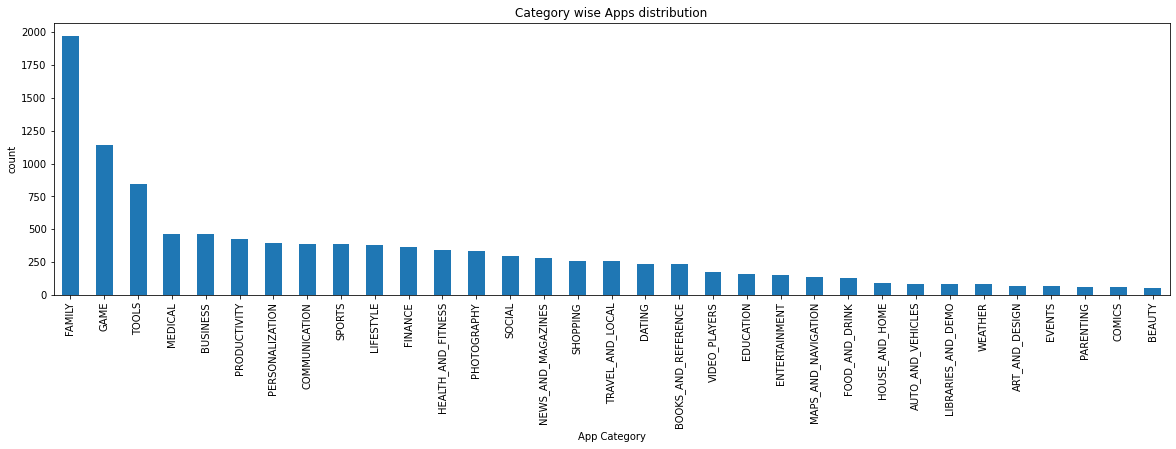

In [284]:
#Plotting the data
category_apps.plot(kind='bar')   #specifying the chart type
plt.title('Category wise Apps distribution')    #Specifying the title
plt.ylabel('count')          #specifying the Y axis label
plt.xlabel('App Category')   #specifying the X axis label 

Hence, it can be seen that Family category apps have appeared highest number of times and beauty category apps have appeared least number of times in the given data set


### 2. Installs and category

Text(0.5, 1.0, 'App Category Vs Installs')

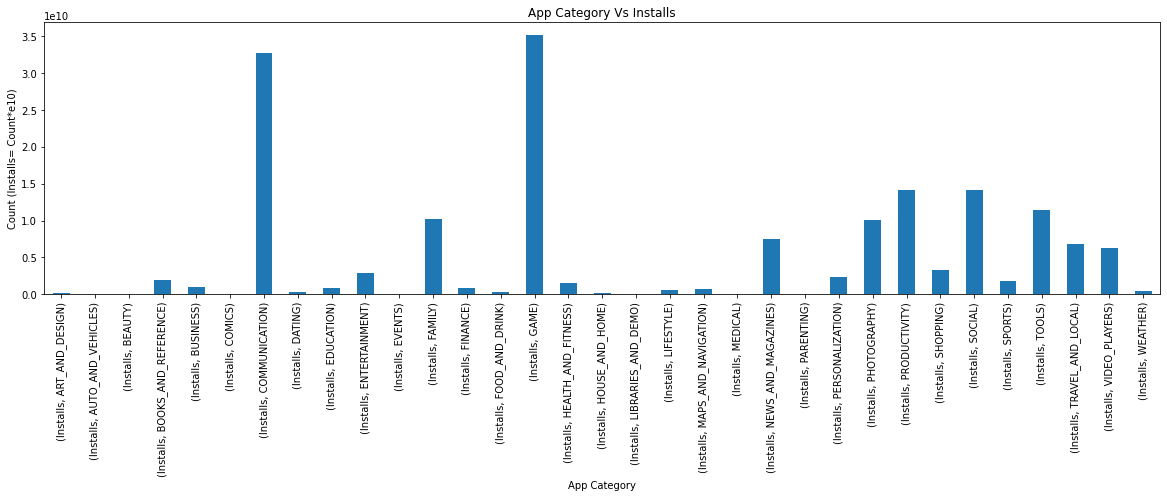

In [285]:
#Lets first get the categories grouped
grouped_category= app_data.groupby('Category')
category_installs= grouped_category[['Installs']].sum().unstack()
category_installs.plot(kind='bar')
plt.xlabel('App Category')
plt.ylabel('Count (Installs= Count*e10)')
plt.title('App Category Vs Installs')

Hence, it can be seen that Games have the highest installs followed by Communication category
### 3. Category and Ratings

In [286]:
rating_category=grouped_category[['Rating']].mean().sort_values(by='Rating',ascending=False).unstack() #calculating mean of rating as per category of apps
rating_category

        Category           
Rating  EVENTS                 4.395313
        EDUCATION              4.388462
        ART_AND_DESIGN         4.355385
        BOOKS_AND_REFERENCE    4.335498
        PERSONALIZATION        4.328827
        PARENTING              4.300000
        GAME                   4.286888
        BEAUTY                 4.283019
        HEALTH_AND_FITNESS     4.280059
        SHOPPING               4.263077
        SOCIAL                 4.261017
        WEATHER                4.248780
        SPORTS                 4.236458
        PRODUCTIVITY           4.226651
        MEDICAL                4.216199
        HOUSE_AND_HOME         4.211364
        LIBRARIES_AND_DEMO     4.207059
        AUTO_AND_VEHICLES      4.205882
        FAMILY                 4.204564
        PHOTOGRAPHY            4.197910
        FOOD_AND_DRINK         4.185827
        BUSINESS               4.182391
        COMMUNICATION          4.180103
        NEWS_AND_MAGAZINES     4.161837
        COMI

Hence, it can be seen that EVENTS category apps have the highest average rating
### 4. App/Apps with highest rating

In [287]:
df=app_data[app_data['Rating']==5]  #Considering the apps with ratings equal to 5
df.sort_values(by='App')            #sorting te apps alphabetically

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
7466,211:CK,GAME,5.0,8.0,38000.0,10,Paid,0.99,Teen,Arcade,2018-04-11,4.1 and up
8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1.0,3.7,10,Paid,1.49,Everyone,Education,2018-05-18,2.1 and up
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2.0,11000.0,100,Free,0.00,Mature 17+,Medical,2018-06-06,4.1 and up
2522,420 BZ Budeze Delivery,MEDICAL,5.0,2.0,11000.0,100,Free,0.00,Mature 17+,Medical,2018-06-06,4.1 and up
5828,A-Y Collection,SHOPPING,5.0,2.0,2.9,100,Free,0.00,Teen,Shopping,2018-02-16,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
9427,ei Calc,TOOLS,5.0,2.0,19000.0,10,Free,0.00,Everyone,Tools,2015-10-12,2.3 and up
9178,i am EB,PHOTOGRAPHY,5.0,1.0,5.4,10,Free,0.00,Teen,Photography,2017-02-01,4.1 and up
6030,iCard BD Plus,SOCIAL,5.0,2.0,2.4,500,Free,0.00,Everyone,Social,2016-07-15,2.0 and up
7756,iReadMe,PRODUCTIVITY,5.0,8.0,22000.0,100,Free,0.00,Everyone,Productivity,2018-03-06,4.4 and up


Hence, there are 274 apps with 5 star rating
### 5. Top 5 apps apps based on the installs

In [288]:
top_apps= app_data.sort_values(by='Installs',ascending=False)
top_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
3896,Subway Surfers,GAME,4.5,27711703.0,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,4.1 and up
3943,Facebook,SOCIAL,4.1,78128208.0,4.3,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,4.3,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211.0,4.3,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device
3565,Google Drive,PRODUCTIVITY,4.4,2731211.0,4.3,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device


In [289]:
print(f'Top 5 highly installed apps are: {", ".join(top_apps["App"].head(5))}')

Top 5 highly installed apps are: Subway Surfers, Facebook, Messenger – Text and Video Chat for Free, Google Drive, Google Drive


### 6. Type of apps most downloaded

In [290]:
#Lets see which type of app has been downloaded the most
app_type= app_data.groupby('Type')[['Installs']].sum().unstack()
app_type

          Type
Installs  Free    167560478406
          Paid        72956081
dtype: int64

Hence, Free apps have the highest number of installs
### 7.Costliest app

In [291]:
costliest=app_data.sort_values(by= 'Price', ascending=False) #finding costliest app
costliest

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,4.1 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.7,1000,Paid,399.99,Teen,Finance,2017-12-06,4.0.3 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41000.0,1000,Paid,399.99,Everyone,Finance,2018-06-25,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,4.4 and up
4197,most expensive app (H),FAMILY,4.3,6.0,1.5,100,Paid,399.99,Everyone,Entertainment,2018-07-16,7.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
3653,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,4.3,1000000,Free,0.00,Everyone,Weather,2018-06-12,Varies with device
3654,Yandex.Weather,WEATHER,4.5,309617.0,4.3,10000000,Free,0.00,Everyone,Weather,2018-07-23,Varies with device
3655,Local Weather Forecast & Visual Widget,WEATHER,4.5,3478.0,6.1,500000,Free,0.00,Everyone,Weather,2018-08-02,4.2 and up
3656,Wetter by t-online.de,WEATHER,4.2,24349.0,9.2,1000000,Free,0.00,Everyone,Weather,2018-05-14,4.1 and up


In [292]:
costliest["App"].head(1), costliest["Price"].head(1)   #fetching the value of costliest app

(4367    I'm Rich - Trump Edition
 Name: App, dtype: object, 4367    400.0
 Name: Price, dtype: float64)

Hence costliest app is I'm Rich - Trump Edition with price of 400$

### 8. Correlation Matrix
Let's calculate and plot correlation matrix for better insights between various parameters in the data set

In [293]:
correlation_matrix= app_data.corr()   #creating and assigning correlation matrix
correlation_matrix

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063166,0.039945,0.045528,-0.019269
Reviews,0.063166,1.000000,0.072382,0.643123,-0.009666
Size,0.039945,0.072382,1.000000,0.008288,-0.014653
Installs,0.045528,0.643123,0.008288,1.000000,-0.011688
Price,-0.019269,-0.009666,-0.014653,-0.011688,1.000000


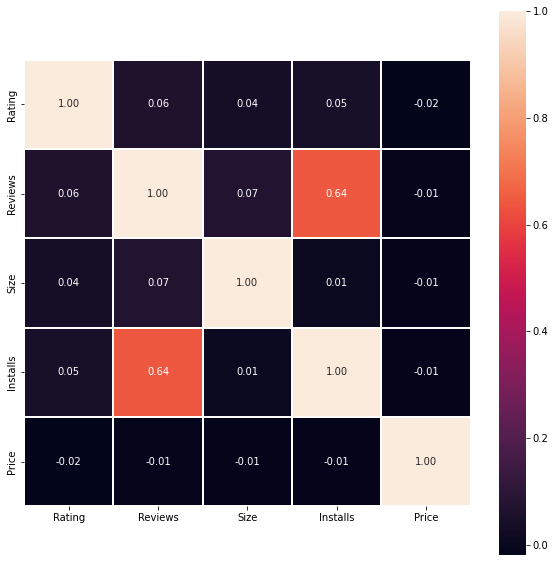

In [294]:
plt.subplots(figsize=(10,10))
sns.heatmap(data= correlation_matrix,linewidths=1,square=True,annot=True,fmt='0.2f')
plt.show()

From the above correlation heatmap:
1. Its clear that apps with higher number of reviews are installed more

## Summary and inference of Playstore Apps data set
1. Game and Communication category of apps are mostly installed by the users
2. Apps belonging to Event Category have the highest average rating
3. There are 274 apps with 5 star rating
4. Top 5 installed apps are: Subway Surfers, Facebook, Messenger – Text and Video Chat for Free, Google Drive, Google Drive
5. Free apps are mostly installed by the users
6. Apps with higher number of reviews are installed more compared to apps with lesser number of reviews
7. costliest app is I'm Rich - Trump Edition with price of 400$

# Performing Sentiment Analysis using Data set 2 i.e., User Reviews

In [333]:
#Importing the Data set
user_reviews= pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

In [334]:
user_reviews.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [335]:
user_reviews.tail(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


## Description of Columns
1. App: The App to which user review is provided.
2. Translated Review: Review Provided by the user after processing.
3. Sentiment: Either Positive or negative.
4. Sentiment Polarity: Quantitative description of the sentiment of the review. Ranges from -1 to 1.
5. Sentiment Subjectivity: Provides the relevance of the reviewer with respect to the app

## Data Cleaning

In [336]:
#Finding the shape of the given data set
user_reviews.shape

(64295, 5)

In [337]:
#Lets firtsly findout the unique values in App Column
user_reviews['App'].nunique()

1074

There are in total 1074 unique apps

In [338]:
#lets Count NaN Values
user_reviews.isna().count()

App                       64295
Translated_Review         64295
Sentiment                 64295
Sentiment_Polarity        64295
Sentiment_Subjectivity    64295
dtype: int64

In [339]:
#Lets drop NaN values
user_reviews.dropna(inplace=True)

Since the Review is alreday processed for assessing Sentiment, Sentiment Polarity and Sentiment Subjectivity we can drop the Translated_Review Column

In [340]:
#dropping Translated_Review column
user_reviews.drop(['Translated_Review'],inplace=True,axis=1)

In [347]:
#checking for modified Data set
user_reviews.head(5)

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
5,10 Best Foods for You,Positive,1.00,0.300000
